In [1]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
from stephenHeadConfig import conf as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:4 val:5
Done 4 of 127 movies, count:4 val:5
Done 5 of 127 movies, count:6 val:5
Done 6 of 127 movies, count:9 val:5
Done 7 of 127 movies, count:12 val:5
Done 8 of 127 movies, count:12 val:5
Done 9 of 127 movies, count:12 val:5
Done 10 of 127 movies, count:15 val:5
Done 11 of 127 movies, count:18 val:5
Done 12 of 127 movies, count:18 val:8
Done 13 of 127 movies, count:18 val:8
Done 14 of 127 movies, count:18 val:8
Done 15 of 127 movies, count:21 val:8
Done 16 of 127 movies, count:21 val:10
Done 17 of 127 movies, count:24 val:10
Done 18 of 127 movies, count:24 val:10
Done 19 of 127 movies, count:24 val:10
Done 20 of 127 movies, count:24 val:13
Done 21 of 127 movies, count:24 val:16
Done 22 of 127 movies, count:26 val:16
Done 23 of 127 movies, count:28 val:16
Done 24 of 127 movies, count:28 val:16
Done 25 of 127 movies, count:31 val:16
Done 26 of 127 movi

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [6]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py
from stephenHeadConfig import sideconf as conf


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

Done 0 of 127 movies, count:3 val:0
Done 1 of 127 movies, count:3 val:3
Done 2 of 127 movies, count:3 val:5
Done 3 of 127 movies, count:4 val:5
Done 4 of 127 movies, count:4 val:5
Done 5 of 127 movies, count:6 val:5
Done 6 of 127 movies, count:9 val:5
Done 7 of 127 movies, count:12 val:5
Done 8 of 127 movies, count:12 val:5
Done 9 of 127 movies, count:12 val:5
Done 10 of 127 movies, count:15 val:5
Done 11 of 127 movies, count:18 val:5
Done 12 of 127 movies, count:18 val:8
Done 13 of 127 movies, count:18 val:8
Done 14 of 127 movies, count:18 val:8
Done 15 of 127 movies, count:21 val:8
Done 16 of 127 movies, count:21 val:10
Done 17 of 127 movies, count:24 val:10
Done 18 of 127 movies, count:24 val:10
Done 19 of 127 movies, count:24 val:10
Done 20 of 127 movies, count:24 val:13
Done 21 of 127 movies, count:24 val:16
Done 22 of 127 movies, count:26 val:16
Done 23 of 127 movies, count:28 val:16
Done 24 of 127 movies, count:28 val:16
Done 25 of 127 movies, count:31 val:16
Done 26 of 127 movi

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [1]:
# convert from dropbox to the newer location
import pickle
with open('cacheHead/valdata_dropbox','rb') as f:
    isval,localdirs,seldirs = pickle.load(f)
localdirs[0][35:]
ll = ['/home/mayank/work/PoseEstimationData' + x[35:] for x in localdirs]
ll[0]
with open('cacheHead/valdata','wb') as f:
    pickle.dump([isval,ll,seldirs],f)

In [18]:
_,valmovies = multiResData.getMovieLists(conf)
print valmovies[0]
print valmovies[3]

/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C001H001S0001/C001H001S0001.avi
/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_002/C001H001S0001/C001H001S0001.avi


In [2]:
# copy the validation file from front view to side view
import pickle
import os
import re

from stephenHeadConfig import conf
conforig = conf
from stephenHeadConfig import sideconf as conf
outfile = os.path.join(conforig.cachedir,conforig.valdatafilename)
assert os.path.isfile(outfile),"valdatafile doesn't exist"

with open(outfile,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)

newdirs = []    
for ndx,l in enumerate(localdirs):
    if ndx == 19:
        newdirs.append('/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_005/C001H001S0002/C001H001S0002.avi')
    else:
        newdirs.append(re.sub('C002','C001',l,count = 3))
#     print('%d %d:%s' % (ndx,os.path.isfile(newdirs[-1]),newdirs[-1]))

outfile = os.path.join(conf.cachedir,conf.valdatafilename)

with open(outfile,'w') as f:
    pickle.dump([isval,newdirs,seldirs],f)
    

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf

pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-4000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 4020, Train = 22.358,4.9, Val = 24.875,5.8
Iter 4050, Train = 17.910,4.4, Val = 27.512,5.7
Iter 4080, Train = 23.938,5.3, Val = 26.428,6.3
Iter 4110, Train = 18.922,4.8, Val = 26.940,6.1
Iter 4140, Train = 25.144,8.4, Val = 25.839,5.8
Iter 4170, Train = 31.608,10.8, Val = 26.722,6.3
Iter 4200, Train = 20.151,4.7, Val = 29.493,6.6
Iter 4230, Train = 18.094,4.2, Val = 25.424,5.6
Iter 4260, Train = 19.945,4.7, Val = 23.853,5.6
Iter 4290, Train = 21.303,5.7, Val = 24.442,5.5
Iter 4320, Train = 21.194,4.8, Val = 24.688,5.3
Iter 4350, Train = 27.568,6.3, Val = 26.338,5.6
Iter 4380, Train = 23.107,4.3, Val = 31.949

In [2]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf

pobj = PoseTrain.PoseTrain(sideconf)
pobj.baseTrain(restore=True)

ValueError: Variable base/scale0/layer1/weights already exists, disallowed. Did you mean to set reuse=True in VarScope?

In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHead/headBase-5000
Parameters that dont match for mrf:
Loading mrf variables from /home/mayank/work/tensorflow/cacheHead/headMRF-1000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:mrf/mrf/weights/Adam:0
Initializing variable:mrf/mrf/weights/Adam_1:0
Initializing variable:mrf/mrf/biases/Adam:0

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=False)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 44.034,9.0, Val = 46.599,9.9 (29.1,31.2),(5.5,6.4)
Saved state to /home/mayank/work/tensorflow/cacheHeadSide/headMRF-0
Iter 30, Train = 42.716,9.0, Val = 45.233,9.8 (26.3,32.9),(5.7,6.6)
Iter 60, Train = 42.679,8.8, Val = 43.306,9.4 (27.7,31.9),(5.7,6.4)
Iter 90, Train = 37.974,7.8, Val = 43.164,9.5 (26.9,32.6),(5.8,6.5)
Iter 120, Train = 37.672,8.4, Val = 41.580,9.1 (27.5,31.8),(5.2,6.4)
Iter 150, Train = 37.503,7.5, Val = 41.710,9.3 (24.0,32.6),(4.8,6.6)
Iter 180, Train = 37.309,7.4, Val = 40.235,9.0 (23.5,31.2),(4.9,6.3)
Iter 210, Train = 39.818,8.2, Val = 40.695,9.1 (35.7,33.2),(6.8,6.7)
Ite

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.acTrain(restore=False)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Loading base from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Not loading AC variables. Initializing them
Initializing variable:beta1_power:0

In [1]:
import PoseTrain
reload(PoseTrain)
import tensorflow as tf
from stephenHeadConfig import conf as conf

pobj = PoseTrain.PoseTrain(conf)
pobj.fineTrain(restore=True)

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-5000
Parameters that dont match for mrf:
Loading mrf variables from /home/mayank/work/tensorflow/cacheHead/headMRF-1500
Parameters that dont match for fine:
Loading fine variables from /home/mayank/work/tensorflow/cacheHead/headFine-2000
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:fine/fine_siamese/1_1/fine_1/weights/Adam:0
Initializing variable:fine/fine_siamese/1_1/fine_1/weights/Adam_1:0
Initializing variable:fine/fine_siamese/1_1/fine_1/biases/Adam:0
Initializing variable:fine/fine_siamese/1_1/fine_1/biases/Adam_1:0
Initializing variable:fine/fine_siamese/1_1/fine_1/batch_norm/beta/Adam:0
Initializing variable:fine/fine_siamese/1_1/fin

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [ ]:
ll = np.max(berr,1)

zz = np.argwhere(ll>15)
from matplotlib import cm
fig = plt.figure(figsize=(8,5))
for idx in range(zz.shape[0]):
    img = zz[idx,0]

    fig.clf()
    ax12 = fig.add_subplot(1,1,1)
    ax12.imshow(all_images[img][0,:,:,0],cmap=cm.gray)

    all_locs = np.zeros([5,3,2])
    for ondx in range(conf.n_classes):
        maxndx = np.argmax(basepred[img][0,:,:,ondx])
        predloc = np.array(np.unravel_index(maxndx,basepred[img].shape[1:3]))
        predloc = predloc * conf.pool_scale 
        all_locs[ondx,0,:] = predloc
        maxndx = np.argmax(mrfpred[img][0,:,:,ondx])
        mrfloc = np.array(np.unravel_index(maxndx,mrfpred[img].shape[1:3]))
        mrfloc = mrfloc * conf.pool_scale 
        all_locs[ondx,1,:] = predloc
        maxndx = np.argmax(finepred[img][0,:,:,ondx])
        finepredloc = (np.array(np.unravel_index(maxndx,finepred[img].shape[1:3]))-conf.fine_sz/2)
        all_locs[ondx,2,:]= predloc+finepredloc


    plt.scatter(labels[img][0,:,0]/conf.rescale,labels[img][0,:,1]/conf.rescale,
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,0,1],all_locs[:,0,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.2,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,2,1],all_locs[:,2,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.6,
                linewidths=0,edgecolors='face',s=5)
    outname = 'results/headBaseAndFine%d.png'%idx
#     plt.savefig(outname,dpi=500)
#     raw_input('Press Enter')


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io

# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# extrastr = '_side'
# outtype = 1

from stephenHeadConfig import conf as conf
conf.useMRF = True
outtype = 2
extrastr = ''

conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2
_,valmovies = multiResData.getMovieLists(conf)
for ndx in [-1,-3]:
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
    pname = '/home/mayank/Dropbox/Results/stephenHeadTracking/movies/' + oname + extrastr
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant')

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores,'expname':valmovies[ndx]})



print pp
print predList[1].shape

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will ret


batch_size doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHead/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
Loading mrf variables from /home/mayank/work/tensorflow/cacheHead/headMRF-1500
[(0, 0), (0, 0), (32, 32), (0, 0), (0, 0)]
(1455, 128, 128, 5, 2)


In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf
odir = 'results/headResults/MRF_side/'


# conf = sideconf
conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,3])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.mrfPred],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    all_preds[count,:,:,:,1] = curpred[1]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = PoseTools.getBasePredLocs(curpred[1],conf)[0,:,:]
    predLocs[count,:,:,2] = self.locs[0,:,:]
    ims[count,:,:] = self.xs[0,0,:,:]

Initial lower res layer size None, 128, 128, 128
Initial higher res layer size None, 128, 128, 128
Crop start lower res layer at 0, 0, 0, 0
Final size of lower res layer None, 128, 128, 128
Parameters that dont match for base:
batch_size doesnt match
cachedir doesnt match
cropLoc doesnt match
view doesnt match
Loading base variables from /home/mayank/work/tensorflow/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
batch_size doesnt match
Loading mrf variables from /home/mayank/work/tensorflow/cacheHeadSide/headMRF-3000


/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


[  2874.   5153.  10649.]
[ 30.  31.  32.]


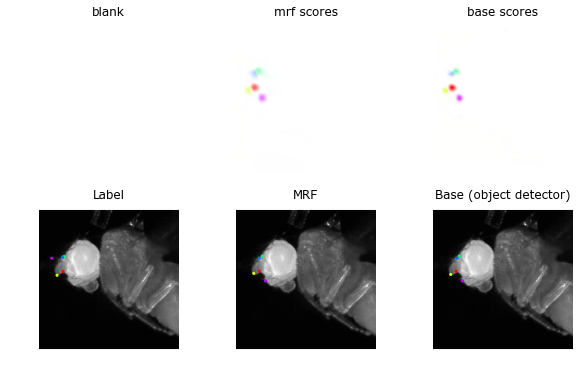

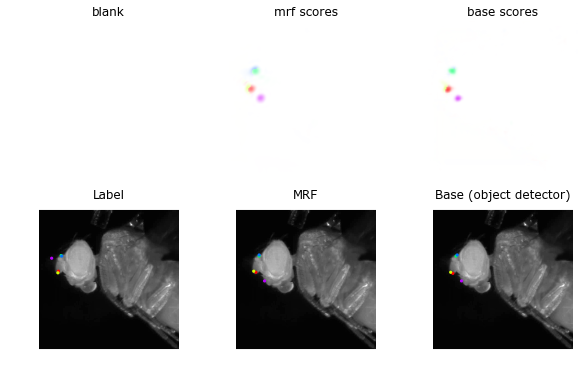

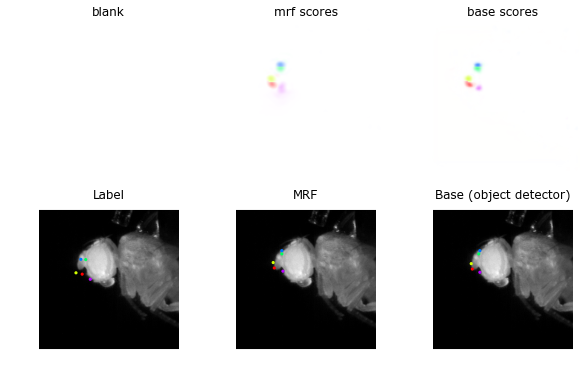

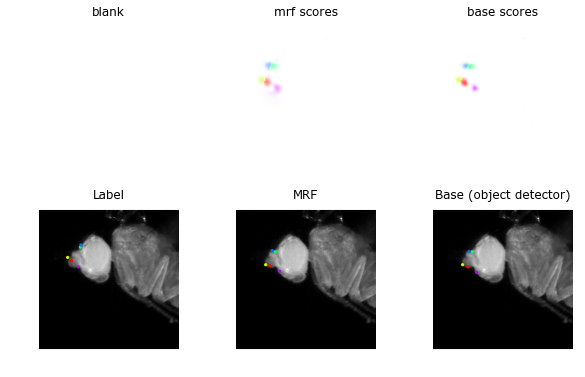

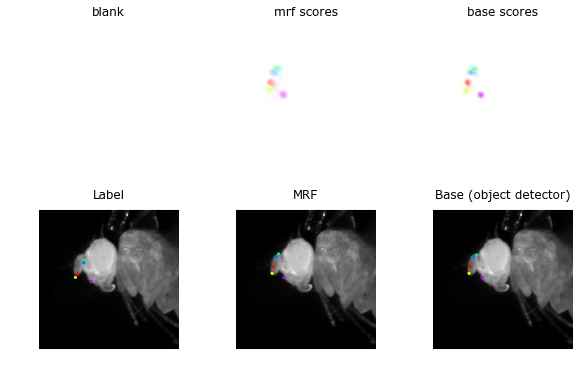

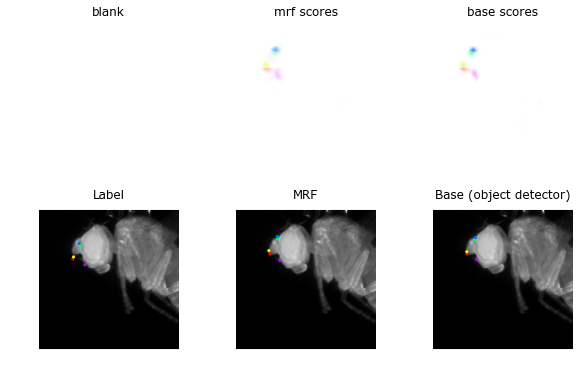

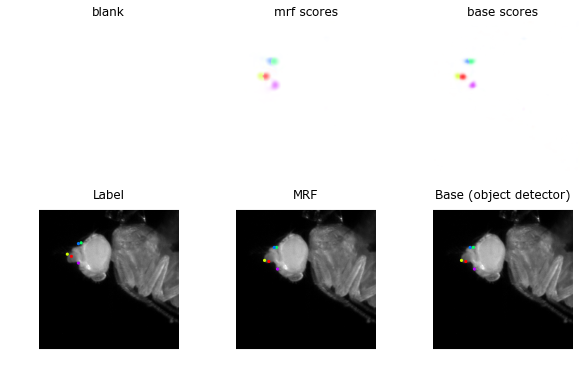

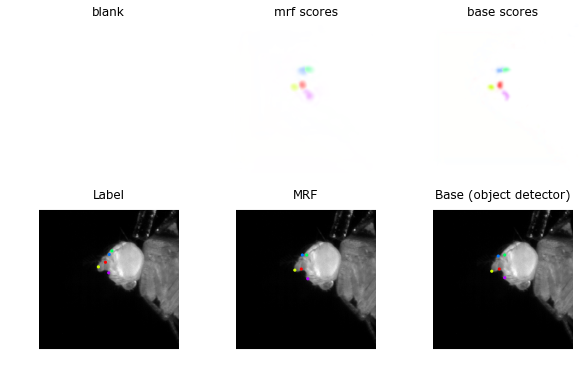

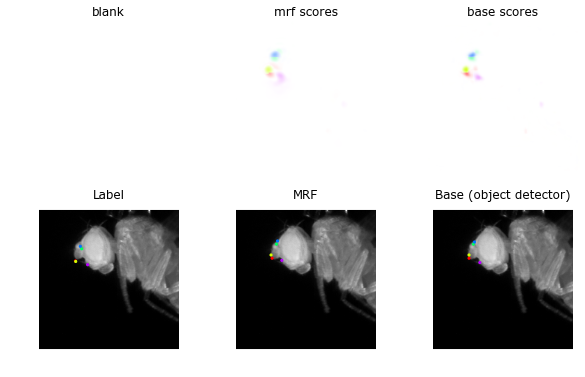

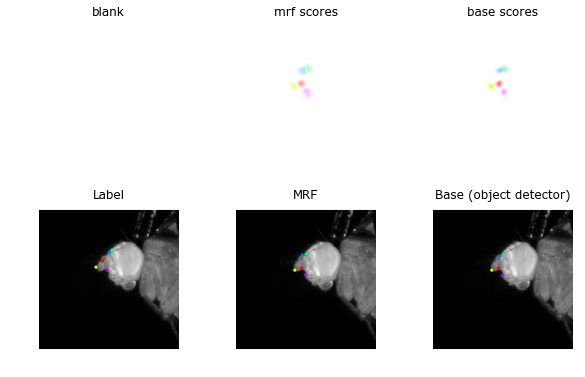

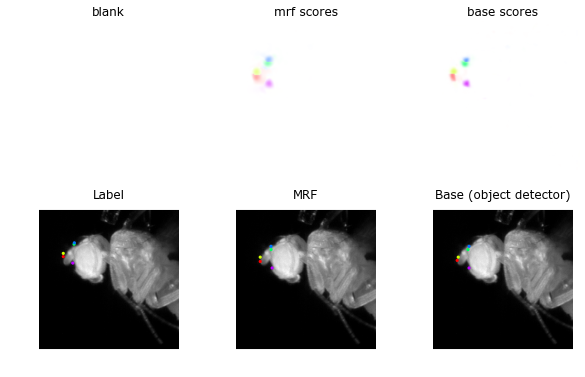

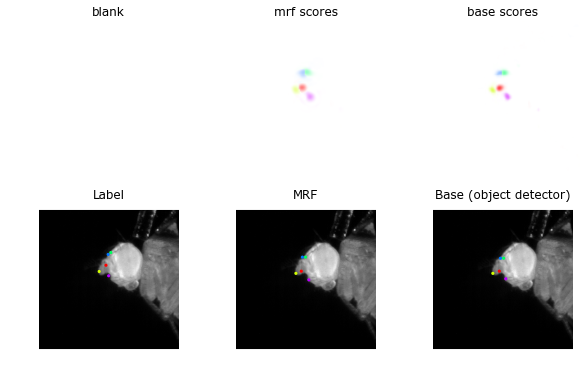

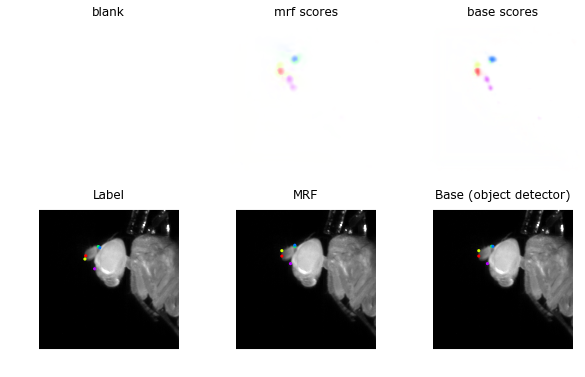

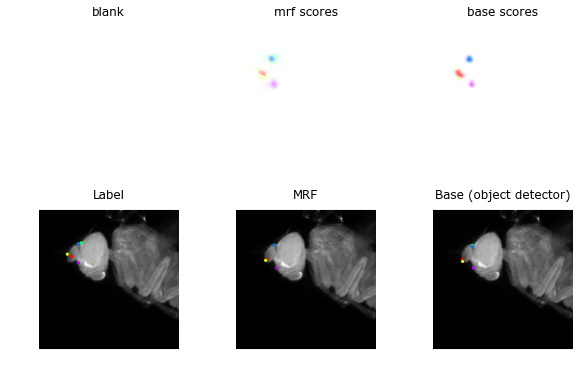

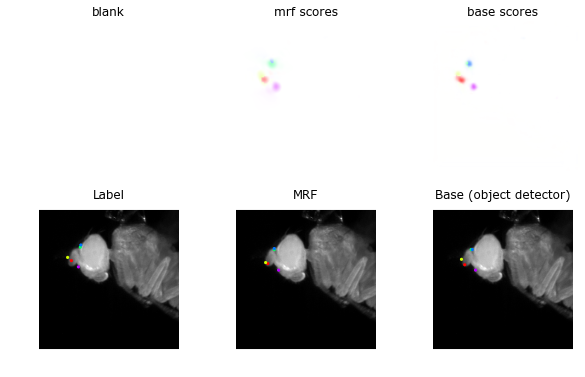

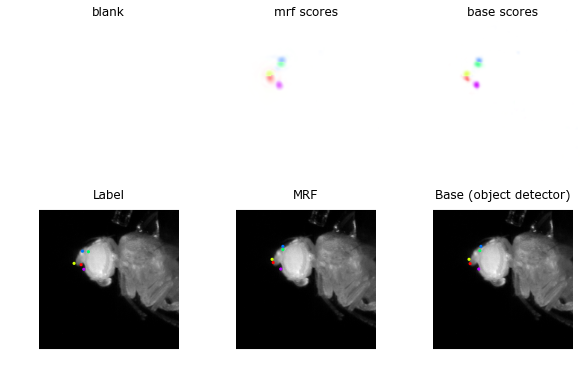

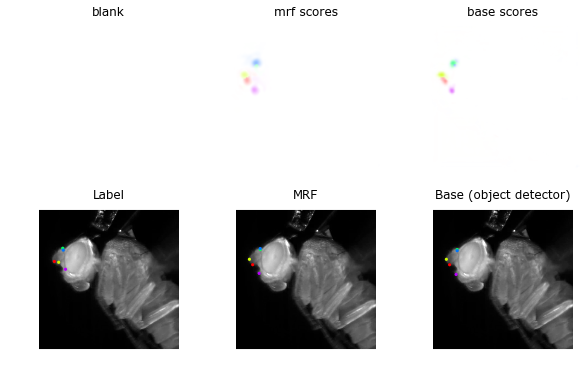

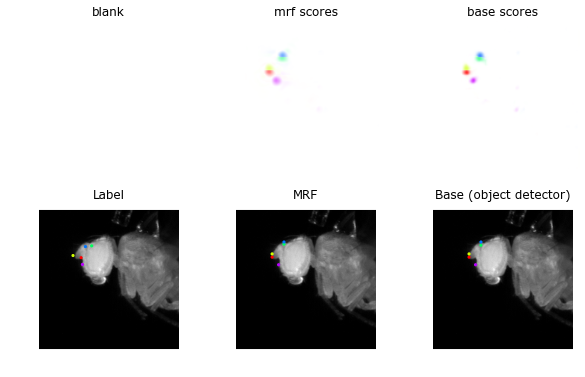

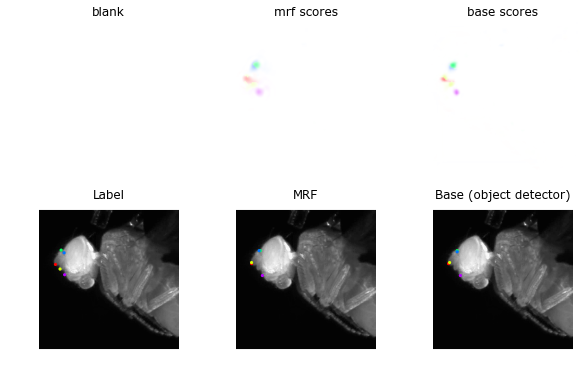

In [3]:
diff = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
bname = odir + 'MRF_impact_dmaxMRFLabel_%d.png'
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,2]))
oo = dd.argsort()
# diffb = (predLocs[:,:,:,0]-predLocs[:,:,:,2])**2
# diffm = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
# ddb = np.squeeze(np.apply_over_axes(np.sum,diffb,[1,2])) 
# ddm = np.squeeze(np.apply_over_axes(np.sum,diffm,[1,2])) 
# # oo = (ddb-ddm).argsort()
# # bname = odir + 'MRF_impact_maxImprovement_%d.png'
# oo = (ddm-ddb).argsort()
# bname = odir + 'MRF_impact_minImprovement_%d.png'
print dd[oo[-4:-1]]
print dd[oo[:3]]
nc = 2
nr = 3
for ndx in range(1,20):
    curi = oo[-ndx]
    aa1 = PoseTools.createPredImage(all_preds[curi,:,:,:,0],conf.n_classes)
    aa2 = PoseTools.createPredImage(2*all_preds[curi,:,:,:,1]-1,conf.n_classes)
    fig = plt.figure(figsize=(10,6))
    ax2 = fig.add_subplot(nc,nr,1)
    ax2.set_title('blank')
    ax2.axis('off')
    ax1 = fig.add_subplot(nc,nr,3)
    ax1.imshow(aa1)
    ax1.axis('off')
    ax1.set_title('base scores')
    ax2 = fig.add_subplot(nc,nr,2)
    ax2.imshow(aa2)
    ax2.axis('off')
    ax2.set_title('mrf scores')
    ax3 = fig.add_subplot(nc,nr,4)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,2],predLocs[curi,:,1,2], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Label')
    ax3 = fig.add_subplot(nc,nr,5)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,1],predLocs[curi,:,1,1], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('MRF')
    ax3 = fig.add_subplot(nc,nr,6)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,0],predLocs[curi,:,1,0], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Base (object detector)')
    plt.show()
    fig.savefig(bname%ndx)